# Libraries.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 1: Load the data.
    1. Load the data.
    2. Describe the structure of the data.

In [38]:
filename = 'data.csv'
data = pd.read_csv(filename)
data.head()

,Name,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Hyundai i10 Era,60000,Petrol,Manual,2,19.81,1086,68.05,5,2650.0,9
1,Toyota Fortuner 4x2 Manual,73500,Diesel,Manual,1,13.00,2982,168.50,7,22000.0,6
2,Mercedes-Benz E-Class 230 E AT,28888,Petrol,Automatic,1,10.00,2496,157.70,5,7560.0,12
3,Volkswagen Polo Petrol Trendline 1.2L,41000,Petrol,Manual,1,16.47,1198,73.90,5,3100.0,9
4,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,52000,Diesel,Automatic,1,15.68,1999,177.00,5,42000.0,5


In [39]:
data.shape

(4907, 11)

In [40]:
data.describe()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,57325.883432,1.196250,18.280715,1621.659874,112.853436,5.279193,9588.402282,7.545140
std,38433.648533,0.445572,4.391050,599.531875,53.763071,0.798172,11414.224423,3.185934
min,171.000000,1.000000,0.000000,624.000000,34.200000,2.000000,440.000000,2.000000
25%,33000.000000,1.000000,15.260000,1198.000000,74.980000,5.000000,3500.000000,5.000000
50%,53000.000000,1.000000,18.200000,1493.000000,94.000000,5.000000,5680.000000,7.000000
75%,72467.000000,1.000000,21.100000,1968.000000,138.100000,5.000000,10000.000000,9.000000
max,775000.000000,4.000000,33.540000,5998.000000,560.000000,10.000000,160000.000000,23.000000


In [41]:
data.info()
data.apply(lambda s: pd.to_numeric(s, errors = 'coerce').notnull().all())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4907 entries, 0 to 4906
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4907 non-null   object 
 1   Kilometers_Driven  4907 non-null   int64  
 2   Fuel_Type          4907 non-null   object 
 3   Transmission       4907 non-null   object 
 4   Owner_Type         4907 non-null   int64  
 5   Mileage            4907 non-null   float64
 6   Engine             4907 non-null   int64  
 7   Power              4907 non-null   float64
 8   Seats              4907 non-null   int64  
 9   Price              4907 non-null   float64
 10  Age                4907 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 421.8+ KB


Name                 False
Kilometers_Driven     True
Fuel_Type            False
Transmission         False
Owner_Type            True
Mileage               True
Engine                True
Power                 True
Seats                 True
Price                 True
Age                   True
dtype: bool

### Step 2: Data Clearning & Preparation.

In [42]:
# Splitting car brand and model.
if 'Name' in data:
    Brand = data['Name'].apply(lambda x : x.split(' ')[0])
    data.insert(3, "Brand", Brand)
    data.drop(['Name'],axis = 1,inplace = True)
data.head()

,Kilometers_Driven,Fuel_Type,Brand,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,60000,Petrol,Hyundai,Manual,2,19.81,1086,68.05,5,2650.0,9
1,73500,Diesel,Toyota,Manual,1,13.00,2982,168.50,7,22000.0,6
2,28888,Petrol,Mercedes-Benz,Automatic,1,10.00,2496,157.70,5,7560.0,12
3,41000,Petrol,Volkswagen,Manual,1,16.47,1198,73.90,5,3100.0,9
4,52000,Diesel,Land,Automatic,1,15.68,1999,177.00,5,42000.0,5


In [43]:
data.Brand.unique()

array(['Hyundai', 'Toyota', 'Mercedes-Benz', 'Volkswagen', 'Land', 'Ford',
       'BMW', 'Mahindra', 'Maruti', 'Audi', 'Honda', 'Nissan', 'Skoda',
       'Renault', 'Chevrolet', 'Tata', 'Fiat', 'Jeep', 'Datsun', 'Mini',
       'Jaguar', 'Porsche', 'Mitsubishi', 'Volvo', 'Lamborghini', 'Force',
       'Ambassador', 'Bentley', 'ISUZU', 'Isuzu'], dtype=object)

#### Fixing invalid values.
    1. ISUZU = Isuzu
    2. Land -> Land-Rover

In [44]:
data.Brand = data.Brand.str.lower()
data.Brand.replace('land', 'land-rover', inplace = True)
data.Brand.unique()

array(['hyundai', 'toyota', 'mercedes-benz', 'volkswagen', 'land-rover',
       'ford', 'bmw', 'mahindra', 'maruti', 'audi', 'honda', 'nissan',
       'skoda', 'renault', 'chevrolet', 'tata', 'fiat', 'jeep', 'datsun',
       'mini', 'jaguar', 'porsche', 'mitsubishi', 'volvo', 'lamborghini',
       'force', 'ambassador', 'bentley', 'isuzu'], dtype=object)

In [45]:
data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [46]:
data.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [47]:
data.columns

Index(['Kilometers_Driven', 'Fuel_Type', 'Brand', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Age'],
      dtype='object')

<AxesSubplot:>

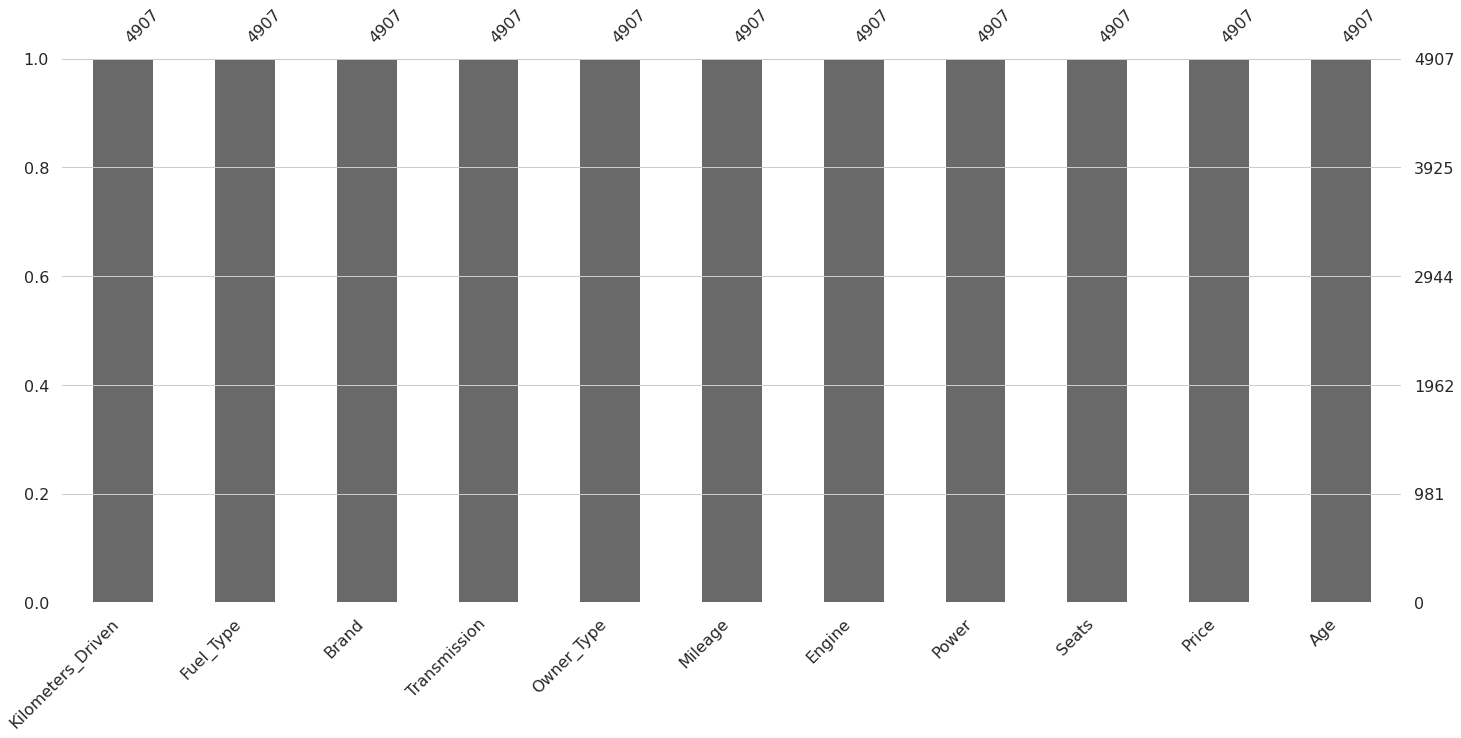

In [48]:
# Identifying missing values.
import missingno as msno

msno.bar(data)

### Step 3: Data Visualization.

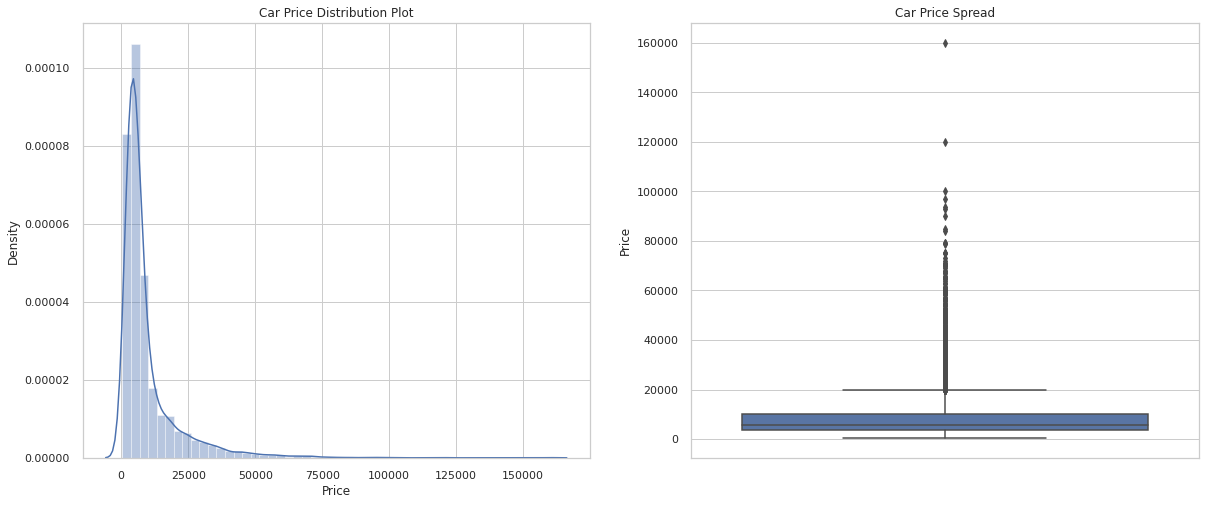

Price median: 5680.0


In [49]:
plt.figure(figsize = (20,8))

plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y = data.Price)

plt.show()

print('Price median:', data['Price'].median())

In [50]:
print(data.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      4907.000000
mean       9588.402282
std       11414.224423
min         440.000000
25%        3500.000000
50%        5680.000000
75%       10000.000000
85%       16583.000000
90%       22500.000000
100%     160000.000000
max      160000.000000
Name: Price, dtype: float64


##### Inference :

    1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are below 22,500.
    2. There is a significant difference between the mean and the median of the price distribution (mean: 9588.402282, median = 50% percentile = 5680.000000).
    3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(90% of the prices are below 22,500, whereas the remaining 15% are between 22,500 and 160,000.)

#### Step 3.1: Catgorical Data Visualization.
    1. Name
    2. Fuel_Type
    3. Transmission

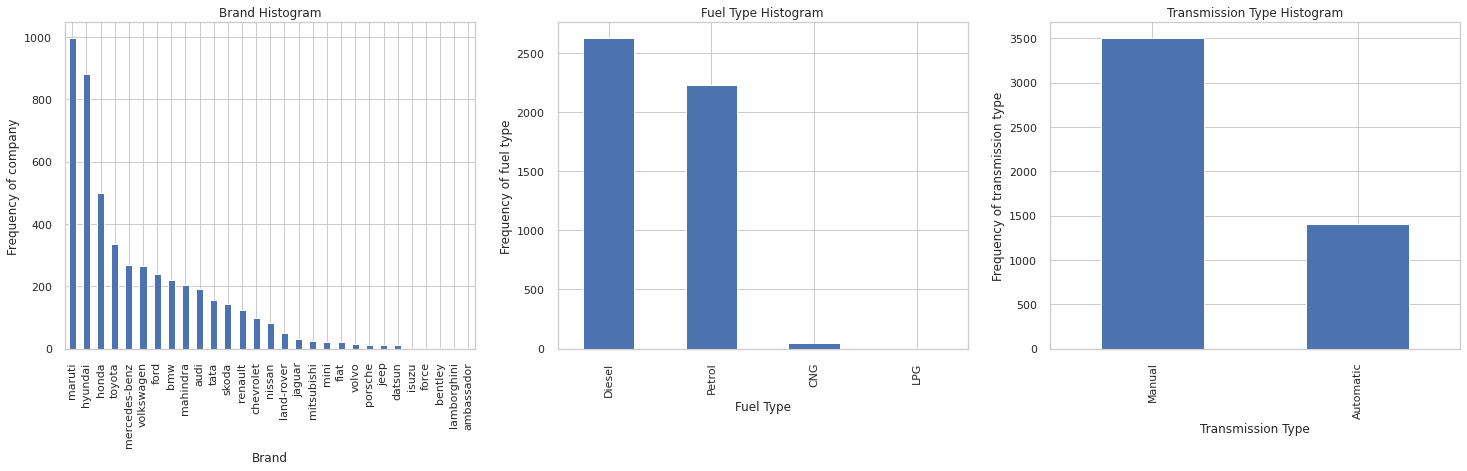

In [51]:
plt.figure(figsize = (25, 6))

plt.subplot(1, 3, 1)
plt1 = data.Brand.value_counts().plot(kind = 'bar')
plt.title('Brand Histogram')
plt1.set(xlabel = 'Brand', ylabel = 'Frequency of company')

plt.subplot(1, 3, 2)
plt1 = data.Fuel_Type.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel = 'Frequency of fuel type')

plt.subplot(1, 3, 3)
plt1 = data.Transmission.value_counts().plot(kind = 'bar')
plt.title('Transmission Type Histogram')
plt1.set(xlabel = 'Transmission Type', ylabel='Frequency of transmission type')

plt.show()

##### Inference :
    1. Maruti, Hyundai seem to be the most favoured car brands.
    2. Number of disel and petrol fueled cars are the most common.
    3. Cars with manual transmission are preferred over cars with automatic transmission.

<Figure size 1800x432 with 0 Axes>

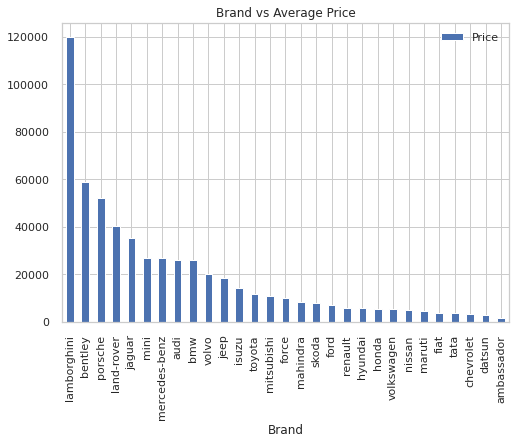

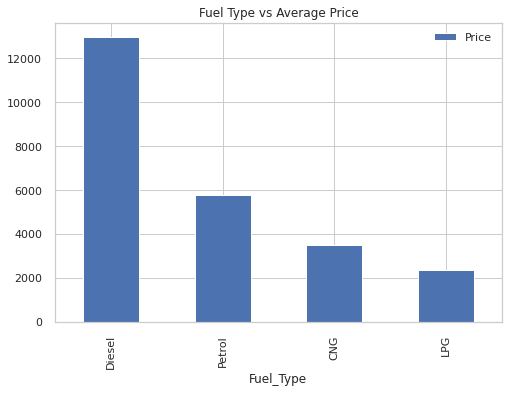

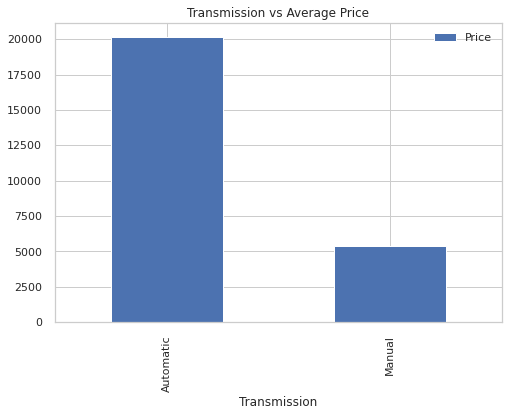

In [52]:
plt.figure(figsize = (25, 6))

df = pd.DataFrame(data.groupby(['Brand'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['Transmission'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Transmission vs Average Price')
plt.show()

##### Inference :
    1. Lamborghini has the highest average price.
    2. Diesel engine has higher average price than petrol engine.
    3. Cars with automatic transmission have higher average price than cars with manual transmission.

#### Step 3.2: Numerical Data Visualization.

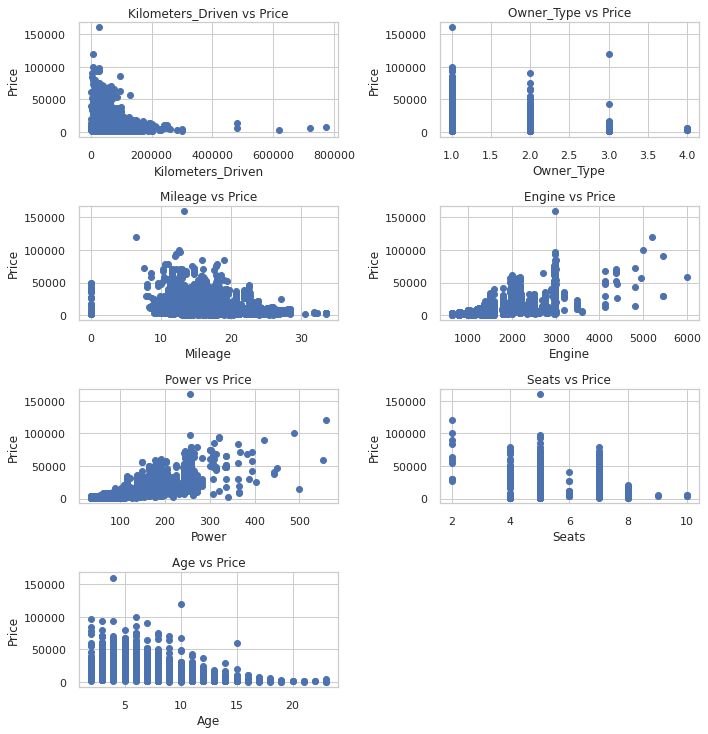

In [53]:
def scatter(x, fig):
    plt.subplot(8, 2, fig)
    plt.scatter(data[x],data['Price'])
    plt.title(x +' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize = (10, 20))

scatter('Kilometers_Driven', 1)
scatter('Owner_Type', 2)
scatter('Mileage', 3)
scatter('Engine', 4)
scatter('Power', 5)
scatter('Seats', 6)
scatter('Age', 7)

plt.tight_layout()

##### Inference:
    1. Power and engine seem to have a positive correlation with price.
    2. Kilometers_Driven, age, mileage, seats and owner type seem to have a negative correlation with price.

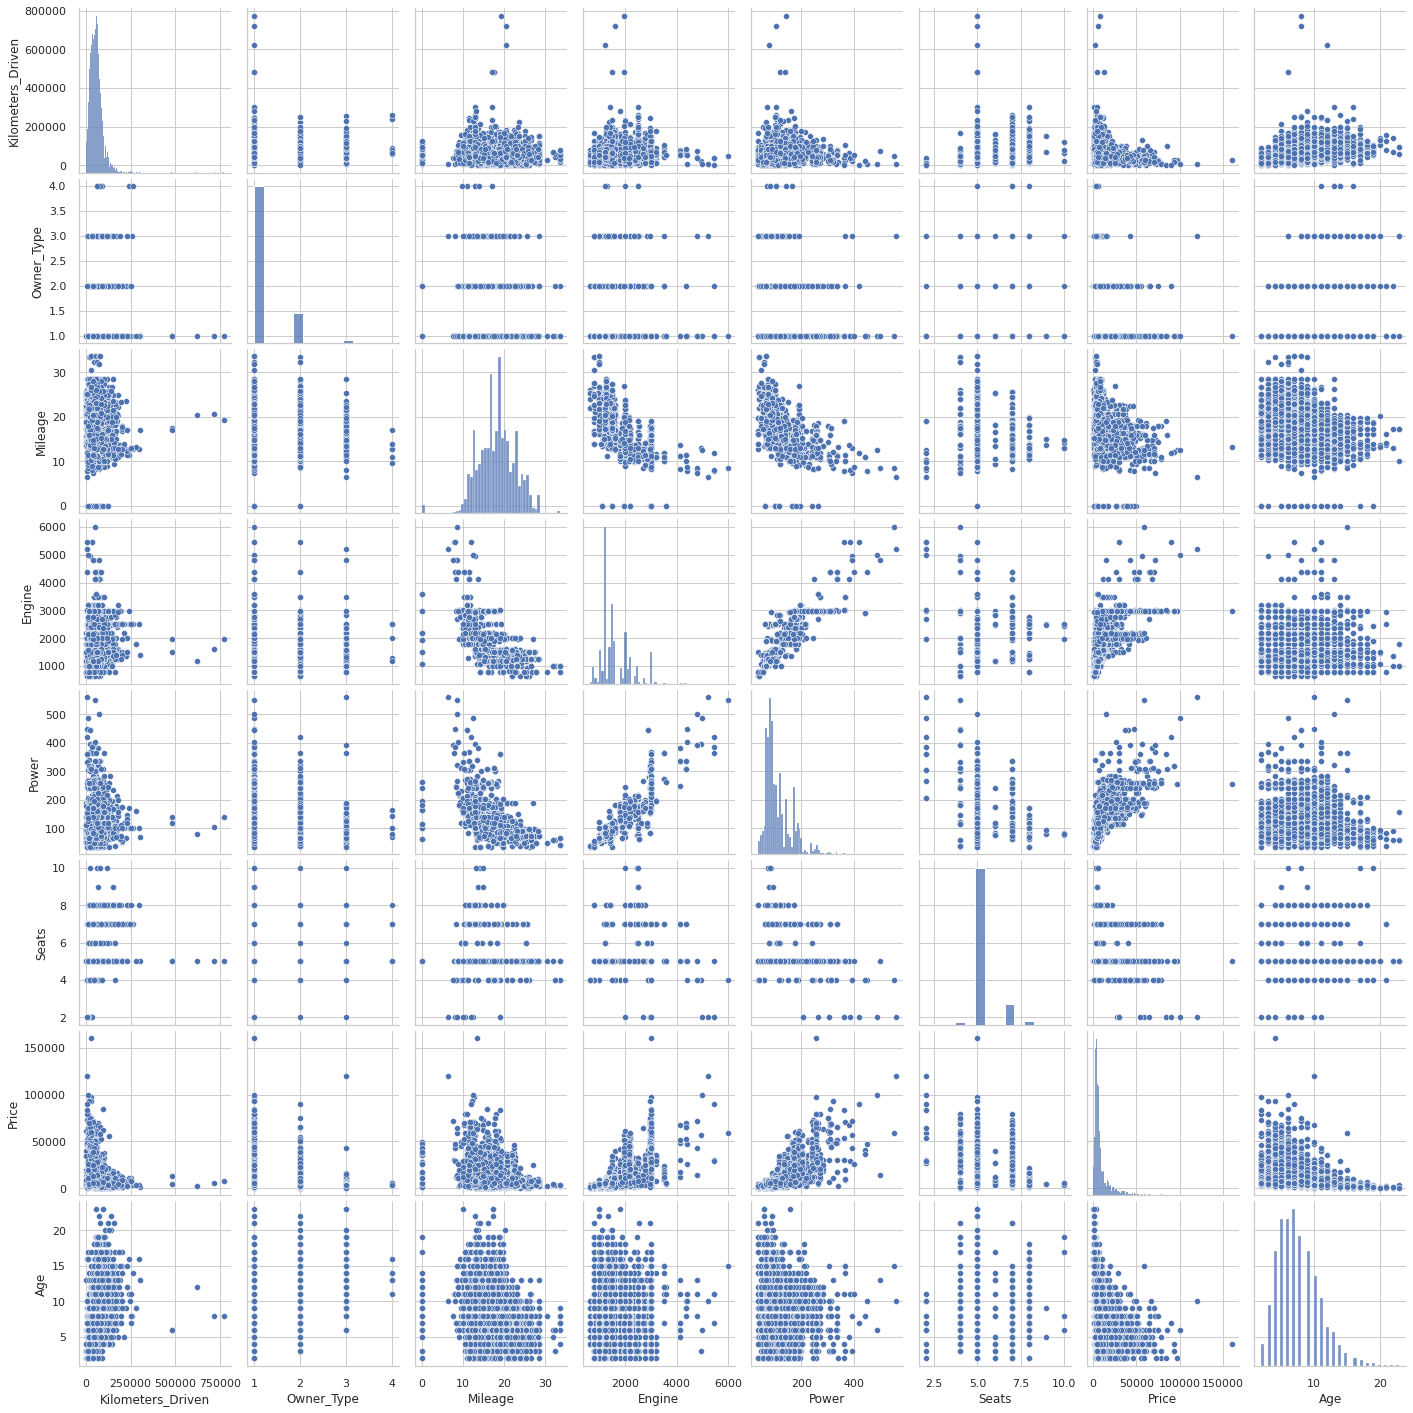

In [54]:
sns.pairplot(data)

#### Step 6: Variable Encoding.

In [55]:
# Defining the map function
def OHE(x, df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

dataOHE = OHE('Fuel_Type', data)
dataOHE = OHE('Transmission', dataOHE)
#dataOHE = OHE('carsrange', dataOHE)
dataOHE = OHE('Brand', dataOHE)

In [56]:
#dataOHE.head()
dataOHE.columns

Index(['Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Age', 'Diesel', 'LPG', 'Petrol', 'Manual', 'audi',
       'bentley', 'bmw', 'chevrolet', 'datsun', 'fiat', 'force', 'ford',
       'honda', 'hyundai', 'isuzu', 'jaguar', 'jeep', 'lamborghini',
       'land-rover', 'mahindra', 'maruti', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'porsche', 'renault', 'skoda', 'tata', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [57]:
dataOHE.shape

(4907, 40)

#### Step 7: Train - Test Split

In [58]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = dataOHE.drop(['Price'], axis=1)
y = dataOHE['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [59]:
X_train.describe()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Age,Diesel,LPG,Petrol,...,mini,mitsubishi,nissan,porsche,renault,skoda,tata,toyota,volkswagen,volvo
count,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,...,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000
mean,56895.863425,1.190448,18.278046,1622.401864,112.729483,5.274607,7.526791,0.529994,0.001747,0.456610,...,0.003786,0.004368,0.015143,0.002330,0.026791,0.030285,0.030868,0.071345,0.053291,0.003786
std,37523.749725,0.443566,4.426619,596.129967,52.944256,0.792854,3.198002,0.499172,0.041769,0.498186,...,0.061420,0.065957,0.122138,0.048217,0.161495,0.171396,0.172985,0.257438,0.224645,0.061420
min,171.000000,1.000000,0.000000,624.000000,34.200000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32807.000000,1.000000,15.100000,1198.000000,74.000000,5.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52415.500000,1.000000,18.200000,1495.000000,97.650000,5.000000,7.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72492.750000,1.000000,21.100000,1980.250000,138.100000,5.000000,9.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,720000.000000,4.000000,33.540000,5461.000000,488.100000,10.000000,23.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


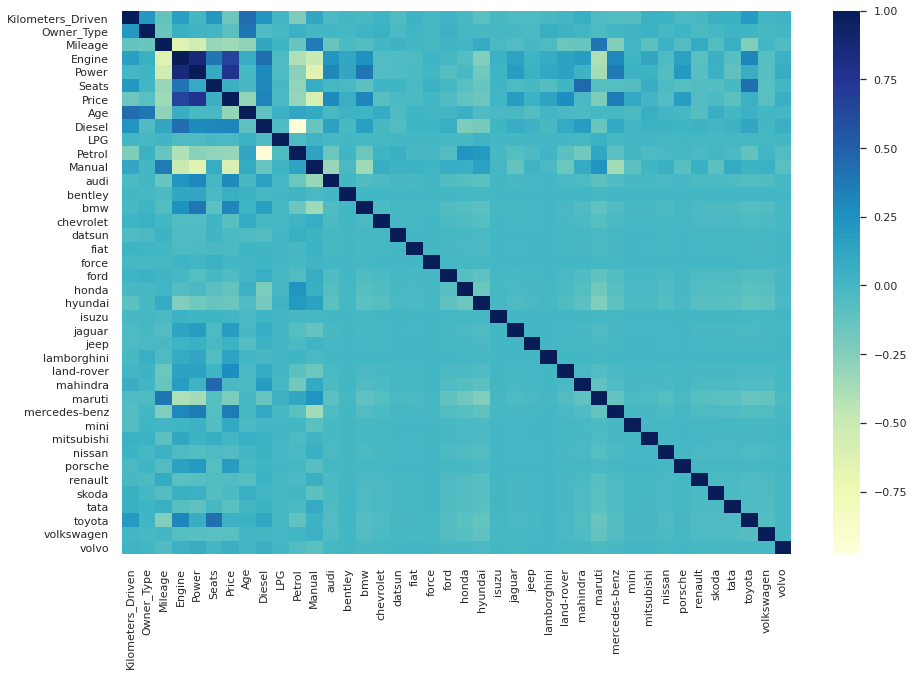

In [60]:
# Linear correlation using heatmap.
features = ['Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Age', 'Diesel', 'LPG', 'Petrol', 'Manual']
X_train_basic = X_train[features]
plt.figure(figsize = (15, 10))
sns.heatmap(dataOHE.corr(), annot = False, cmap="YlGnBu")
plt.show()

##### Inference:
The dependent variable 'Price' seems to be highly lineraly correlated with 'engine' and 'power'.

<AxesSubplot:xlabel='x', ylabel='y'>

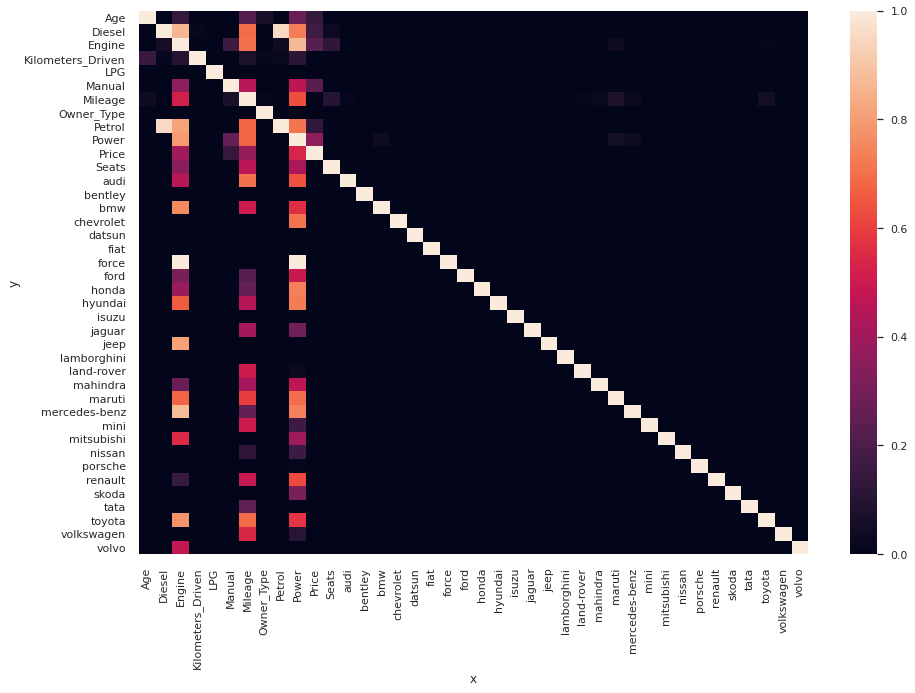

In [61]:
# Non-linear Correlation testing with PPS.
import ppscore as pps

X_train_basic = X_train[features]
plt.figure(figsize = (15, 10))
ppsMatrix = pps.matrix(dataOHE).pivot(columns = 'x', index = 'y',  values = 'ppscore')
sns.heatmap(ppsMatrix, annot = False)

##### Inference:
In addition, the dependent variable 'Price' seems to be highly non-lineraly correlated with Mileage as well.

### Step 8: Model building.

In [62]:
# Extra-Trees Regressor.
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# Instantiating the model.
etr = ExtraTreesRegressor(n_estimators = 100, random_state = 0).fit(X_train, y_train)

# Parameter searching.
gsc = GridSearchCV(
    estimator = etr,
    param_grid = {
        'n_estimators': [150, 100, 70],
        #'max_features': range(5, 8, 10),
        'min_samples_leaf': [10, 4, 3, 2, 1],
        'min_samples_split': [10, 8, 6],
    },
    scoring = 'neg_mean_absolute_error',
    cv = 10
)

# Training the model on every parameter combination.
grid_result = gsc.fit(X_train, y_train)
print("Best score on training data: %f using %s" % (abs(grid_result.best_score_), grid_result.best_params_))

#Best score on training data: -1885.462839 using {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
#Best score on training data: -1872.070558 using {'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}
#Best score on training data: -1828.826088 using {'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 150}
#Best score on training data: -1788.285372 using {'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 150}
#Best score on training data: -1772.711847 using {'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
#Best score on training data: -1714.290835 using {'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}
#Best score on training data: 1585.653037 using {'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}

Best score on training data: 1585.653037 using {'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}


In [63]:
# Re-training the model with optimal parameters.
tuned_etr = ExtraTreesRegressor(**grid_result.best_params_)
tuned_etr.fit(X_train, y_train)

ExtraTreesRegressor(min_samples_split=6, n_estimators=150)

In [64]:
# Testing the optimized model.
y_pred = tuned_etr.predict(X_test)

### Step 9: Model Evaluation.

MSE: 18521623.69926961
MAE: 1724.2991302708008
RMSE: 4303.675603396428
R2: 0.8606760998651851


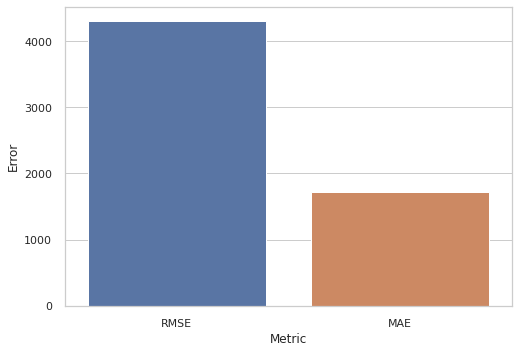

In [65]:
# Measuring model performance.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
data = {'Metric': ['RMSE', 'MAE'], 'Error': [Decimal(mse ** 0.5), Decimal(mae)]}
errors_df = pd.DataFrame(data)  

sns.set_theme(style = "whitegrid")
ax = sns.barplot(x = "Metric", y = "Error", data = errors_df)

print("MSE:",  mse)
print("MAE:", mae)
print("RMSE:", mse ** (0.5))
print("R2:", r2)

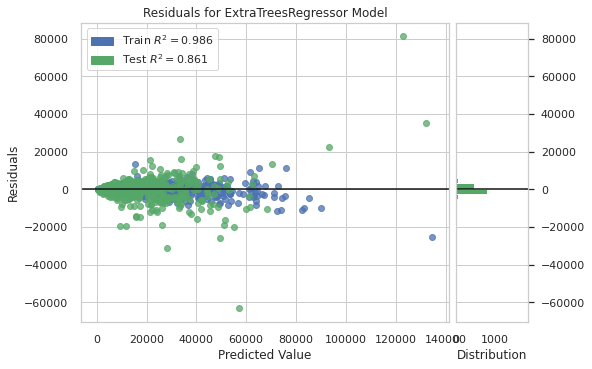

<AxesSubplot:title={'center':'Residuals for ExtraTreesRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
# Residuals plot.
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(tuned_etr)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure